In [4]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from dateutil.parser import parse

import pywt
from statsmodels.tsa.arima.model import ARIMA

In [5]:
Gujarat = pd.read_csv("~/Downloads/sop/Gujarat.csv")
Maharashtra = pd.read_csv("~/Downloads/sop/Maharashtra.csv")
MP = pd.read_csv("~/Downloads/sop/MP2.csv")

In [6]:
# #checking the amount of missing values in the dataset
# na_vals_gj = Gujarat['TPC'].isnull().sum()
# print(f'No of missing observations Gujarat: {na_vals_gj}')
# print(f'% of missing observations Gujarat: {na_vals_gj / len(Gujarat)}')
# na_vals_mh = Maharashtra['TPC'].isnull().sum()
# print(f'No of missing observations Maharashtra: {na_vals_mh}')
# print(f'% of missing observations Maharashtra: {na_vals_mh / len(Maharashtra)}')
# na_vals_mp = Rajasthan['TPC'].isnull().sum()
# print(f'No of missing observations Rajasthan: {na_vals_mp}')
# print(f'% of missing observations Rajasthan: {na_vals_mp / len(Rajasthan)}')

In [7]:
print(Gujarat.head())
print(Maharashtra.head())
print(MP.head())

         Date        BSE   TPR    TPC    PF
0  2020-01-01  1126722.0  0.01  149.0  27.0
1  2020-02-01  1178226.0  0.01  105.0   9.0
2  2020-03-01  1120754.0  0.02  198.0  11.0
3  2020-04-01   618618.0  0.05  321.0  10.0
4  2020-05-01   665317.0  0.05  335.0   3.0
         Date        BSE   TPR    TPC     PF
0  2020-01-01  1338891.0  0.05  644.0  405.0
1  2020-02-01  1348263.0  0.04  485.0  321.0
2  2020-03-01  1295566.0  0.03  404.0  225.0
3  2020-04-01   755252.0  0.07  539.0  327.0
4  2020-05-01   720241.0  0.05  378.0  142.0
         Date       BSE   TPR    TPC    PF  Avg_Rainfall
0  2020-01-01  226778.0  0.03   76.0  31.0      3.212897
1  2020-02-01  642607.0  0.03  173.0  51.0      3.285928
2  2020-03-01  691441.0  0.03  226.0  67.0      1.912995
3  2020-04-01  470779.0  0.03  145.0  33.0      1.100162
4  2020-05-01  399475.0  0.04  148.0  39.0      1.737679


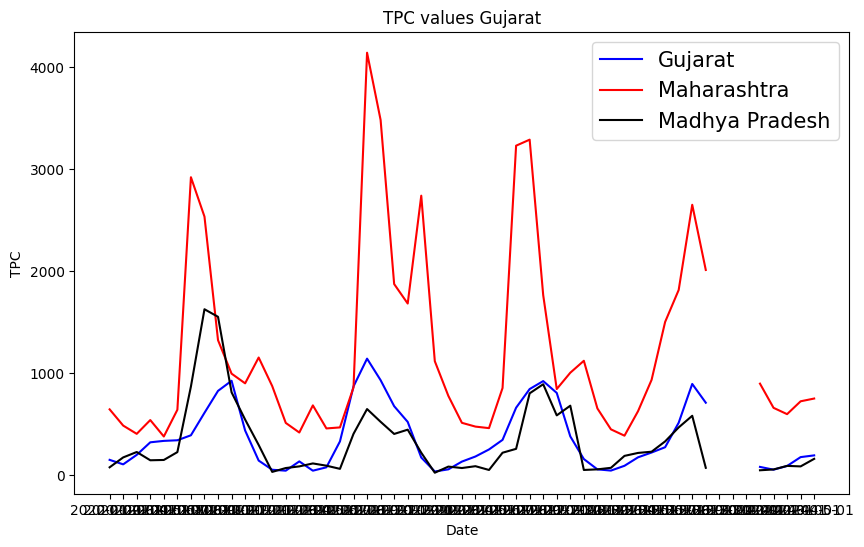

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(Gujarat['Date'], Gujarat['TPC'], label = 'TPC', color='blue')
plt.plot(Maharashtra['Date'], Maharashtra['TPC'], label = 'TPC', color='red')
plt.plot(MP['Date'], MP['TPC'], label = 'TPC', color='black')
plt.title('TPC values Gujarat')
plt.xlabel('Date')
plt.ylabel('TPC')
plt.legend(['Gujarat', 'Maharashtra', 'Madhya Pradesh'], fontsize=15)

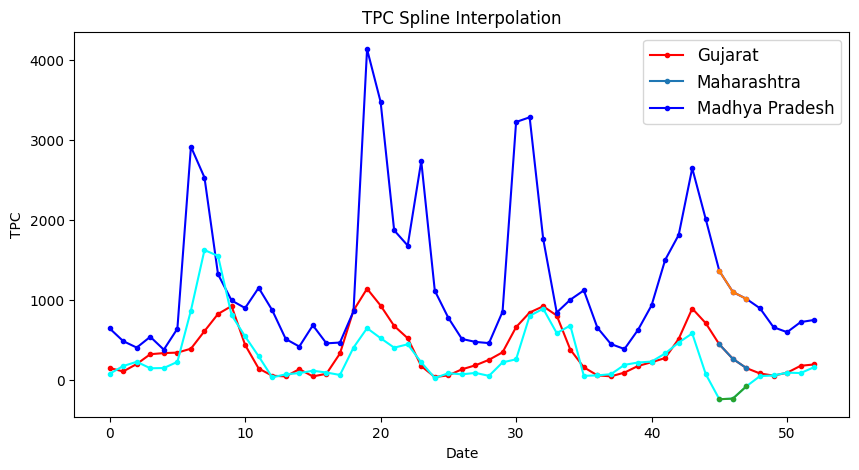

In [38]:
#Spline interpolation
si_gj = Gujarat.copy()
si_mh = Maharashtra.copy()
si_mp = MP.copy()

si_gj_imputed = si_gj['TPC'].interpolate(method='spline', order=3, s=0.1)
ax = si_gj_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], color='red')
si_gj_imputed[si_gj['TPC'].isnull()].plot(ax=ax, legend=None, marker=".")

si_mh_imputed = si_mh['TPC'].interpolate(method='spline', order=3, s=0.1)
ax = si_mh_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], color='blue')
si_mh_imputed[si_mh['TPC'].isnull()].plot(ax=ax, legend=None, marker=".")

si_mp_imputed = si_mp['TPC'].interpolate(method='spline', order=3, s=0.1)
ax = si_mp_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], color='cyan')
si_mp_imputed[si_mp['TPC'].isnull()].plot(ax=ax, legend=None, marker=".")

ax.set_title('TPC Spline Interpolation')
ax.set_xlabel('Date')
ax.set_ylabel('TPC')
ax.legend(['Gujarat', 'Maharashtra', 'Madhya Pradesh'], fontsize=12)

In [10]:
MP['TPC_interpolated'] = MP['TPC'].interpolate(method='spline', order=3, s=0.1)

# decompose_tpc = seasonal_decompose(MP['TPC_interpolated'], model='additive', period=12)
# tpc_seasonal = decompose_tpc.seasonal

MP['TPC_seasonal'] = seasonal_decompose(MP['TPC_interpolated'], model='additive', period=12).seasonal

corr = MP['TPC_seasonal'].corr(MP['Avg_Rainfall'])
corr

np.float64(0.6127009869723474)

In [11]:
# seasonal decomposition and interpolation
#GUJARAT
#STL can't handle missing data, linear interpolation used to fill missing data before decomposing time series using STL
si_gj['Date'] = pd.to_datetime(si_gj['Date'])
si_gj_numeric = si_gj['TPC']
si_gj_interpolated = si_gj_numeric.interpolate(method="linear")
res = STL(si_gj_interpolated, seasonal=31, period=12).fit()

# plt.rc("figure", figsize=(8, 4))
# plt.rc("font", size=5)
# res.plot();

In [12]:
#seasonal decomposition and interpolation
#MAHARASHTRA
#STL can't handle missing data, linear interpolation used to fill missing data before decomposing time series using STL
si_mh['Date'] = pd.to_datetime(si_mh['Date'])
si_mh_numeric = si_mh['TPC']
si_mh_interpolated = si_mh_numeric.interpolate(method="linear")
res = STL(si_mh_interpolated, seasonal=31, period=12).fit()

# plt.rc("figure", figsize=(8, 6))
# plt.rc("font", size=5)
# res.plot();

In [13]:
#seasonal decomposition and interpolation
#MADHYA PRADESH
#STL can't handle missing data, linear interpolation used to fill missing data before decomposing time series using STL
si_mp['Date'] = pd.to_datetime(si_mp['Date'])
si_mp_numeric = si_mp['TPC']

#changing the method to linear for si_mp_rainfall here changes the seasonal plot comparing tpc and rainfall for mp
si_mp_interpolated = si_mp_numeric.interpolate(method="linear")
si_mp_rainfall = si_mp['Avg_Rainfall'].interpolate(method="spline", order=3)
res = STL(si_mp_interpolated, seasonal=31, period=12).fit()

# plt.rc("figure", figsize=(8, 6))
# plt.rc("font", size=5)
# res.plot();

In [14]:
# plt.figure(figsize=(10, 6))
# plt.plot(MP['Date'], MP['Avg_Rainfall'], label = 'Rainfall', color='black')
# plt.title('Rainfall values Gujarat')
# plt.xlabel('Date')
# plt.ylabel('Avg Rainfall')
# #plt.legend(['Gujarat', 'Maharashtra', 'Madhya Pradesh'], fontsize=15)

<Axes: >

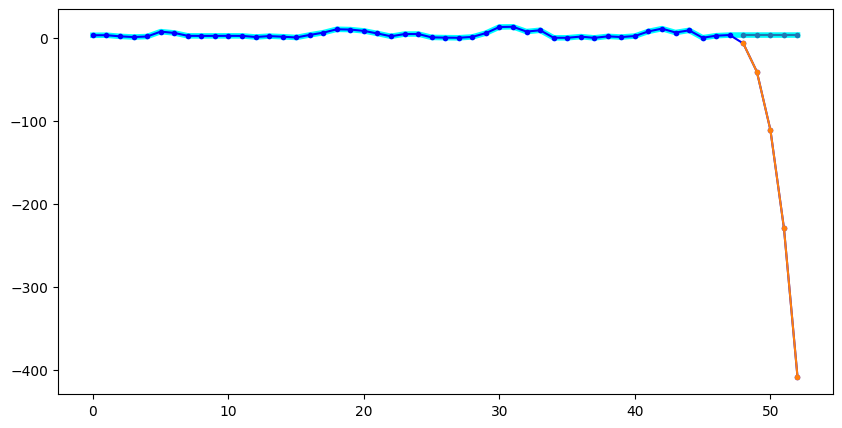

In [15]:
#Compring interpolation of rainfall for linear and spline interpolation

rain_lin_imputed = si_mp['Avg_Rainfall'].interpolate(method='linear')
ax = rain_lin_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], color='cyan', linewidth=4)
rain_lin_imputed[si_mp['Avg_Rainfall'].isnull()].plot(ax=ax, legend=None, marker=".")

rain_spl_imputed = si_mp['Avg_Rainfall'].interpolate(method='spline', order=3)
ax = rain_spl_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], color='blue')
rain_spl_imputed[si_mp['Avg_Rainfall'].isnull()].plot(ax=ax, legend=None, marker=".")

# ax.set_title('TPC Spline Interpolation')
# ax.set_xlabel('Date')
# ax.set_ylabel('TPC')
# ax.legend(['Linear', 'Spline'], fontsize=12)

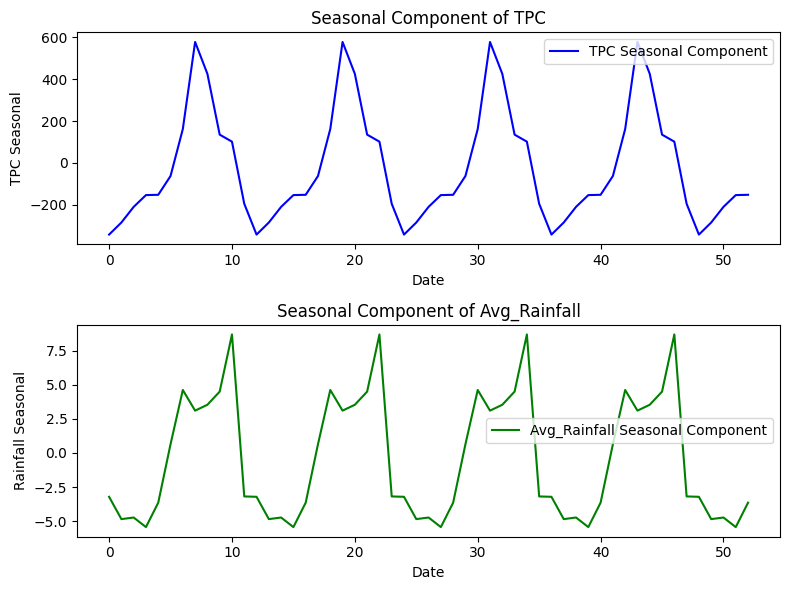

In [16]:
# Set the Date column as the index
MP.set_index('Date', inplace=True)

# Decompose the TPC column to extract seasonal component
decompose_tpc = seasonal_decompose(si_mp_interpolated, model='additive', period=12)
tpc_seasonal = decompose_tpc.seasonal

# Decompose the Avg_Rainfall column to extract seasonal component
decompose_rainfall = seasonal_decompose(si_mp_rainfall, model='additive', period=12)
rainfall_seasonal = decompose_rainfall.seasonal

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Plot TPC seasonal component
axes[0].plot(tpc_seasonal, label='TPC Seasonal Component', color='blue')
axes[0].set_title('Seasonal Component of TPC')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('TPC Seasonal')
axes[0].legend()

# Plot Avg_Rainfall seasonal component
axes[1].plot(rainfall_seasonal, label='Avg_Rainfall Seasonal Component', color='green')
axes[1].set_title('Seasonal Component of Avg_Rainfall')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Rainfall Seasonal')
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

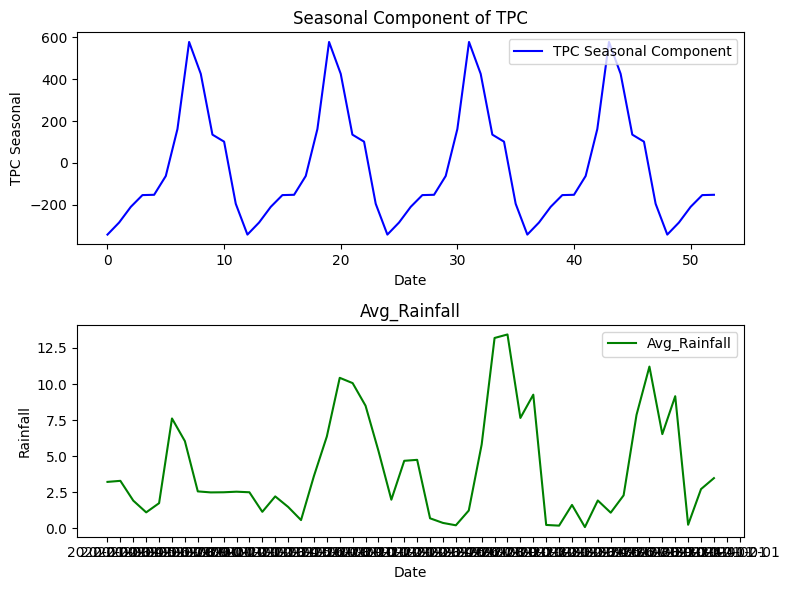

In [17]:
# Set the Date column as the index
MP.reset_index(inplace=True)
MP.set_index('Date', inplace=True)

# Decompose the TPC column to extract seasonal component
decompose_tpc = seasonal_decompose(si_mp_interpolated, model='additive', period=12)
tpc_seasonal = decompose_tpc.seasonal

# # Decompose the Avg_Rainfall column to extract seasonal component
# decompose_rainfall = seasonal_decompose(si_mp_rainfall, model='additive', period=12)
# rainfall_seasonal = decompose_rainfall.seasonal

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Plot TPC seasonal component
axes[0].plot(tpc_seasonal, label='TPC Seasonal Component', color='blue')
axes[0].set_title('Seasonal Component of TPC')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('TPC Seasonal')
axes[0].legend()

# Plot Avg_Rainfall seasonal component
axes[1].plot(MP['Avg_Rainfall'], label='Avg_Rainfall', color='green')
axes[1].set_title('Avg_Rainfall')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Rainfall')
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

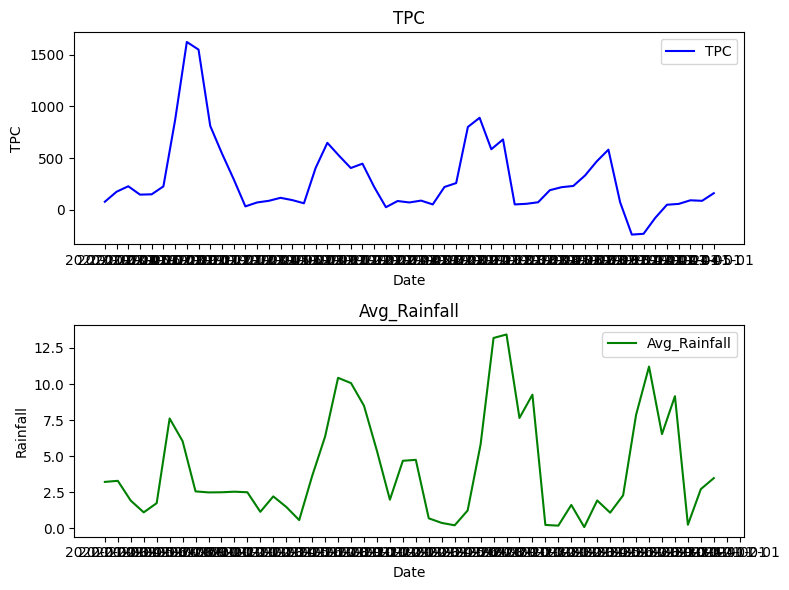

In [18]:
# Set the Date column as the index
MP.reset_index(inplace=True)
MP.set_index('Date', inplace=True)

# Decompose the TPC column to extract seasonal component
decompose_tpc = seasonal_decompose(si_mp_interpolated, model='additive', period=12)
tpc_seasonal = decompose_tpc.seasonal

# # Decompose the Avg_Rainfall column to extract seasonal component
# decompose_rainfall = seasonal_decompose(si_mp_rainfall, model='additive', period=12)
# rainfall_seasonal = decompose_rainfall.seasonal

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Plot TPC seasonal component
axes[0].plot(MP['TPC_interpolated'], label='TPC', color='blue')
axes[0].set_title('TPC')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('TPC')
axes[0].legend()

# Plot Avg_Rainfall seasonal component
axes[1].plot(MP['Avg_Rainfall'], label='Avg_Rainfall', color='green')
axes[1].set_title('Avg_Rainfall')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Rainfall')
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [19]:
result = seasonal_decompose(MP['TPC_interpolated'], model='additive', period=12)
tpc_seasonal = result.seasonal

# Create a new dataframe with Avg_Rainfall and the seasonal component
correlation_df = pd.DataFrame({
    'Avg_Rainfall': MP['Avg_Rainfall'],
    'TPC_Seasonal': tpc_seasonal
})

# Calculate the correlation
correlation = correlation_df['Avg_Rainfall'].corr(correlation_df['TPC_Seasonal'])

print(f"The correlation between Avg_Rainfall and the seasonal component of TPC is: {correlation}")

# plt.figure(figsize=(10, 6))
# plt.scatter(correlation_df['Avg_Rainfall'], correlation_df['TPC_Seasonal'])
# plt.xlabel('Average Rainfall')
# plt.ylabel('TPC Seasonal Component')
# plt.title('Avg_Rainfall vs TPC Seasonal Component')
# plt.show()

The correlation between Avg_Rainfall and the seasonal component of TPC is: 0.6127009869723474


In [20]:
# from sklearn.linear_model import LinearRegression

# x = MP['Rain_interpolated'].values.reshape(-1,1)
# y = MP['TPC_interpolated'].values

# model = LinearRegression()
# model.fit(x, y)

# y_pred = model.predict(x)

# # Coefficients and predictions
# print('Coefficient:', model.coef_)
# print('Intercept:', model.intercept_)

# # Plotting
# plt.figure(figsize=(8, 6))
# plt.scatter(x, y, color='blue', label='Actual Data')
# plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
# plt.xlabel('Average Rainfall')
# plt.ylabel('Malaria Cases')
# plt.title('Linear Regression: Rainfall vs Malaria Cases')
# plt.xlim(0, 1.5)
# plt.ylim(-300, 750)
# plt.legend()
# plt.show()

In [21]:
# MP.reset_index(inplace=True)
# MP['Date'] = pd.to_datetime(MP['Date'])
# corr = MP.corr().round(2)
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# f, ax = plt.subplots(figsize=(5, 5))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True,
#            linewidths=.5, cbar_kws={"shrink": 0.7}, annot=True)
# plt.tight_layout()

In [22]:
MP.reset_index(inplace=True)
MP['Date'] = pd.to_datetime(MP['Date'])
matrix = MP.corr()
# print(matrix)

In [23]:
import statsmodels.api as sm
ac_tpc = sm.tsa.acf(MP['TPC_interpolated'], fft=False)
print(ac_tpc)
ac_tpc_seasonal = sm.tsa.acf(MP['TPC_seasonal'], fft=False)
print(ac_tpc_seasonal)
ac_rainfall = sm.tsa.acf(MP['Avg_Rainfall'], fft=False)

[ 1.          0.75627258  0.36704004  0.03499792 -0.18743207 -0.28273667
 -0.31720638 -0.2770561  -0.17917962 -0.01808561  0.1114833   0.23830055
  0.26034301  0.13673807  0.01103943 -0.09152103 -0.17704961 -0.23469243]
[ 1.          0.73609813  0.30869576 -0.05109152 -0.3864944  -0.6073864
 -0.67538829 -0.59818758 -0.37179267 -0.06202447  0.23941043  0.57754799
  0.76496947  0.56294959  0.23880697 -0.03381675 -0.28750544 -0.4555398 ]


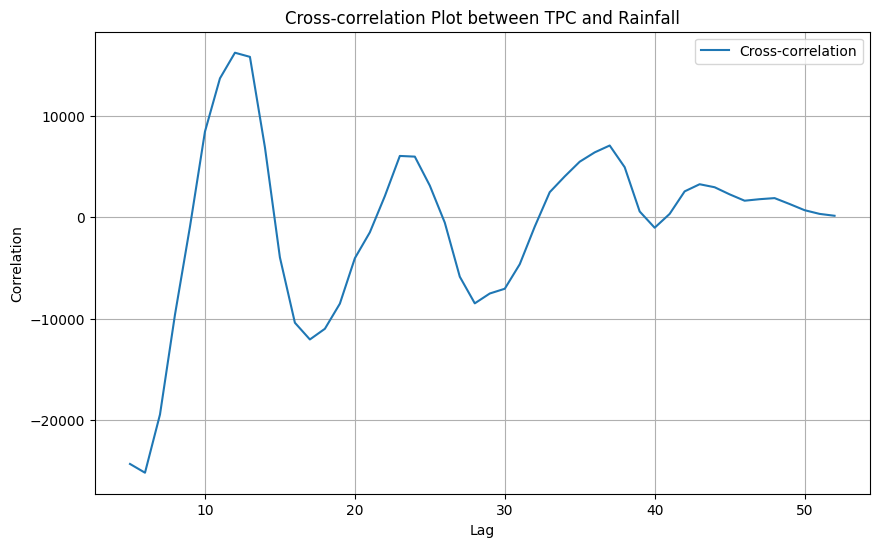

In [24]:
x = MP['TPC_interpolated']
y = MP['Avg_Rainfall']
correlation = np.correlate(x - np.mean(x), y - np.mean(y), mode='full')
lags = np.arange(-len(x) + 1, len(x))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lags, correlation, label='Cross-correlation')
plt.title('Cross-correlation Plot between TPC and Rainfall')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

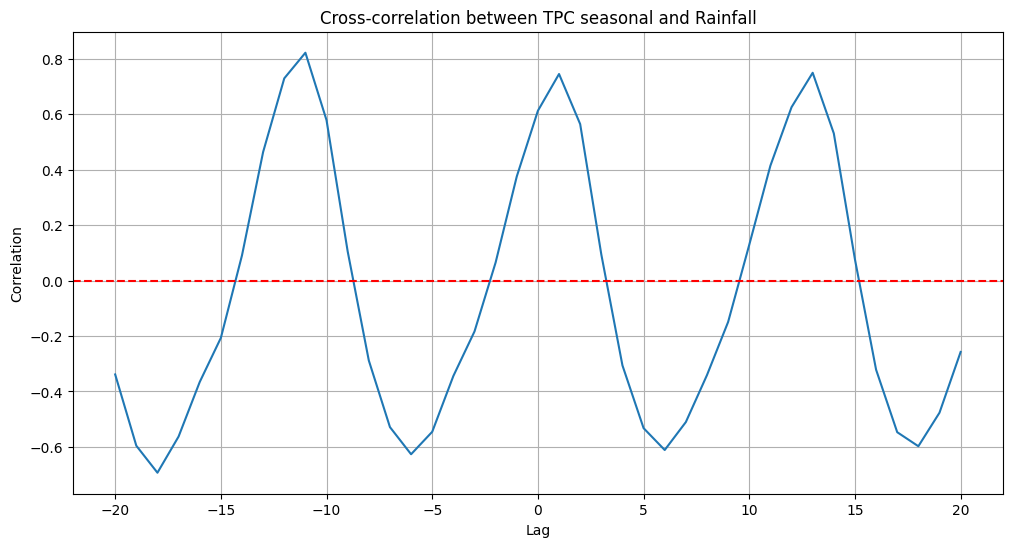

In [25]:
#cross-correlation with negative lags
# Assuming your DataFrame MP is already defined and you have the 'TPC_interpolated' and 'Avg_Rainfall' columns
x = MP['TPC_seasonal']
y = MP['Avg_Rainfall']

max_lags = 20
cross_corr = [x.corr(y.shift(lag)) for lag in range(-max_lags, max_lags + 1)]

lags = range(-max_lags, max_lags + 1)

plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr)
plt.title(f'Cross-correlation between TPC seasonal and Rainfall')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [26]:
# from statsmodels.graphics.tsaplots import plot_acf

# plot_acf(MP['TPC_seasonal'], lags = 10)
# plt.title('Autocorrelation plot of TPC seasonal')
# plt.xlabel('lag')
# plt.ylabel('Autocorrelation')
# plt.show()

In [27]:
# print(MP['TPC'].interpolate(method='spline', order = 4, s=0.1))

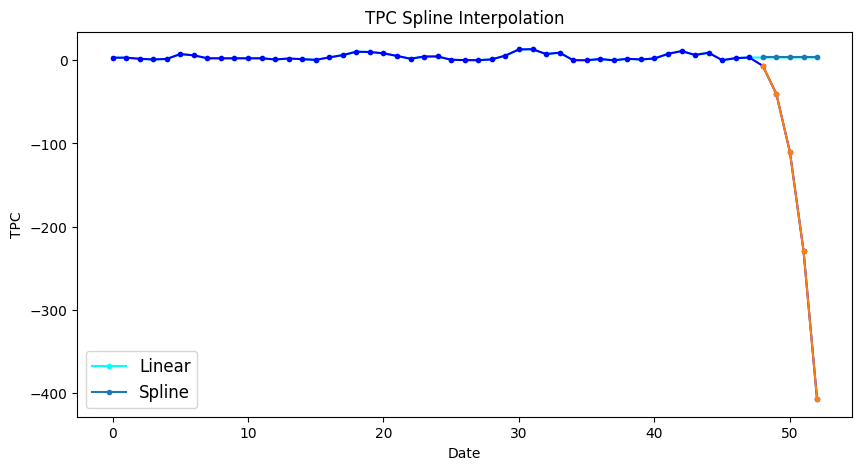

In [28]:
#Compring interpolation of rainfall for linear and spline interpolation

rain_lin_imputed = si_mp['Avg_Rainfall'].interpolate(method='linear')
ax = rain_lin_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], color='cyan')
rain_lin_imputed[si_mp['Avg_Rainfall'].isnull()].plot(ax=ax, legend=None, marker=".")

rain_spl_imputed = si_mp['Avg_Rainfall'].interpolate(method='spline', order=3)
ax = rain_spl_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], color='blue')
rain_spl_imputed[si_mp['Avg_Rainfall'].isnull()].plot(ax=ax, legend=None, marker=".")

ax.set_title('TPC Spline Interpolation')
ax.set_xlabel('Date')
ax.set_ylabel('TPC')
ax.legend(['Linear', 'Spline'], fontsize=12)

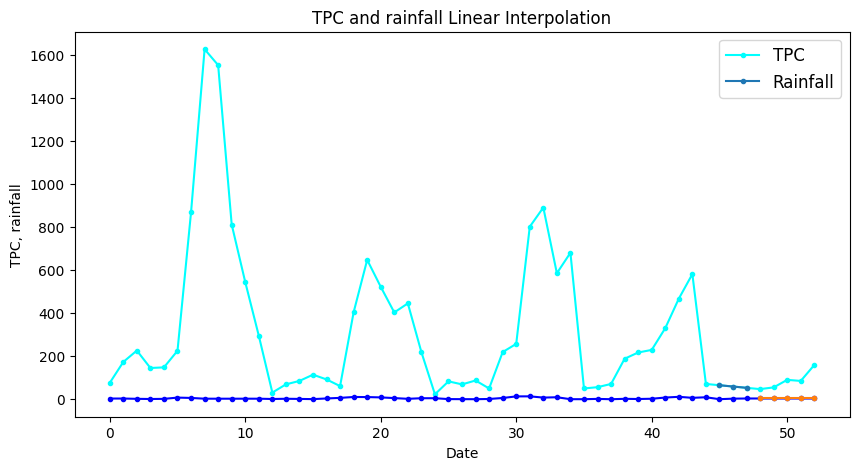

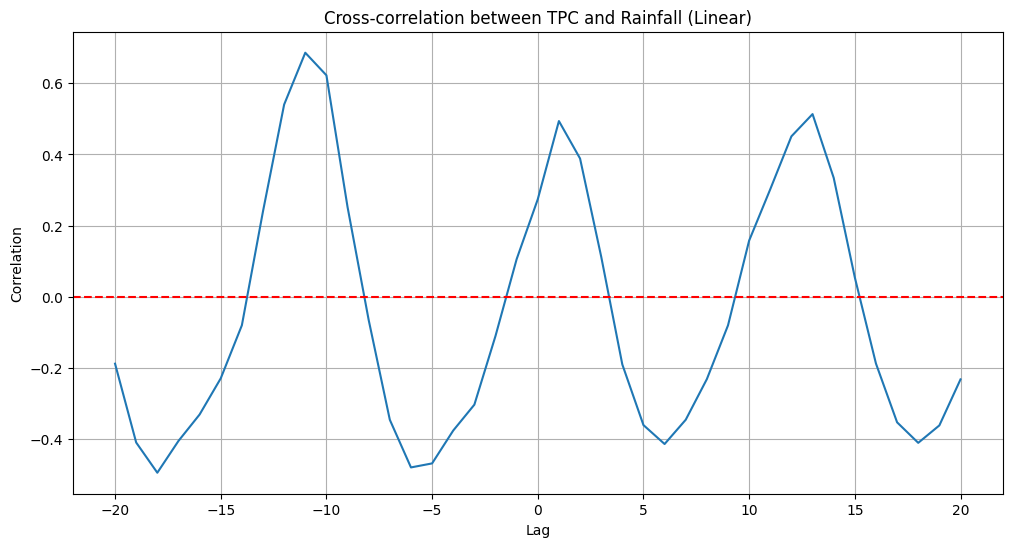

In [29]:
#Linear interpolation
li_mp = MP.copy()

li_mp_imputed = li_mp['TPC'].interpolate(method='linear')
ax = li_mp_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], color='cyan')
li_mp_imputed[li_mp['TPC'].isnull()].plot(ax=ax, legend=None, marker=".")

rain_lin_imputed = li_mp['Avg_Rainfall'].interpolate(method='linear')
ax = rain_lin_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], color='blue')
rain_lin_imputed[li_mp['Avg_Rainfall'].isnull()].plot(ax=ax, legend=None, marker=".")

ax.set_title('TPC and rainfall Linear Interpolation')
ax.set_xlabel('Date')
ax.set_ylabel('TPC, rainfall')
ax.legend(['TPC', 'Rainfall'], fontsize=12)

MP['TPC_linear'] = li_mp['TPC'].interpolate(method='linear')
MP['Avg_Rainfall_linear'] = li_mp['Avg_Rainfall'].interpolate(method='linear')

#cross-correlation with negative lags
x = MP['TPC_linear']
y = MP['Avg_Rainfall_linear']

max_lags = 20
cross_corr = [x.corr(y.shift(lag)) for lag in range(-max_lags, max_lags + 1)]

lags = range(-max_lags, max_lags + 1)

plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr)
plt.title(f'Cross-correlation between TPC and Rainfall (Linear)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [30]:
print(MP.head())
print(MP['TPC_linear'])

        Date       BSE   TPR    TPC    PF  Avg_Rainfall  TPC_interpolated  \
0 2020-01-01  226778.0  0.03   76.0  31.0      3.212897              76.0   
1 2020-02-01  642607.0  0.03  173.0  51.0      3.285928             173.0   
2 2020-03-01  691441.0  0.03  226.0  67.0      1.912995             226.0   
3 2020-04-01  470779.0  0.03  145.0  33.0      1.100162             145.0   
4 2020-05-01  399475.0  0.04  148.0  39.0      1.737679             148.0   

   TPC_seasonal  TPC_linear  Avg_Rainfall_linear  
0   -339.336577        76.0             3.212897  
1   -281.600466       173.0             3.285928  
2   -206.878243       226.0             1.912995  
3   -146.357611       145.0             1.100162  
4   -136.575405       148.0             1.737679  
0       76.0
1      173.0
2      226.0
3      145.0
4      148.0
5      225.0
6      868.0
7     1625.0
8     1551.0
9      811.0
10     544.0
11     295.0
12      31.0
13      69.0
14      85.0
15     114.0
16      92.0
17      61

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


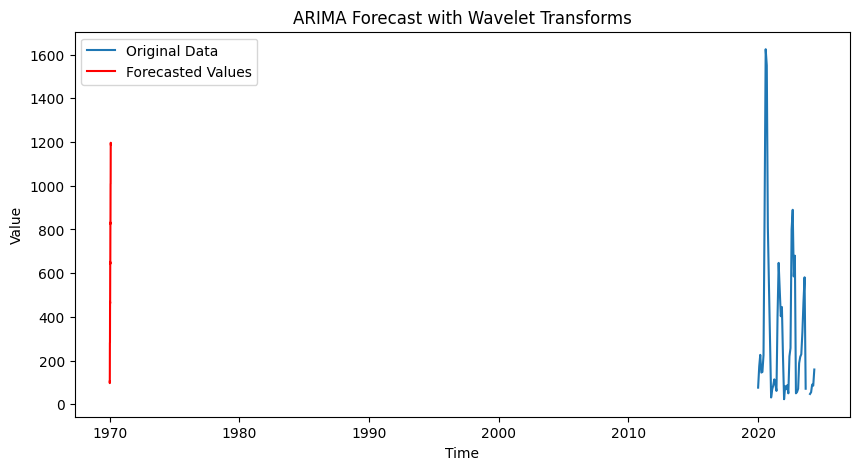

In [37]:
# Decompose the time series using wavelet transform
# Break down the data into different frequency components using wavelet transform
coeffs = pywt.wavedec(MP['TPC'], 'db4', level=1)

# Reconstruct the smoothed version of the time series from the decomposition
approx = pywt.upcoef('a', coeffs[-1], 'db4', level=1, take=5)

# Use ARIMA modeling to capture patterns in the reconstructed data
# You can use other time series algorithms 
model = ARIMA(approx, order=(5,1,0))
model_fit = model.fit()

# Forecast future values
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the original data and the forecasted values
plt.figure(figsize=(10, 5))
plt.plot(MP['Date'], MP['TPC'], label='Original Data')
plt.plot(np.arange(5, 5 + forecast_steps), forecast, label='Forecasted Values', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast with Wavelet Transforms')
plt.legend()
plt.show()